In [45]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

In [3]:
path_train = 'https://media.githubusercontent.com/media/Carloszone/ALY-6020/master/Week%202/mnist_train.csv'
path_test = 'https://media.githubusercontent.com/media/Carloszone/ALY-6020/master/Week%202/mnist_test.csv'

In [4]:
df_train = pd.read_csv(path_train, header=None)
df_test = pd.read_csv(path_test, header=None)

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# set class
class data(object):
    def __init__(self,dataset = df_train):
        self.dataset = dataset.copy()
        # give value for the first column if its value is odd or even
        self.dataset.loc[:,0] = self.dataset.loc[:,0].apply(lambda x: 1 if x%2 == 0 else 0)
        self.X = self.dataset.iloc[:,1:]
        self.Y = self.dataset.iloc[:,0]

    def grid_search(self, parameters, cv):
        x = np.array(self.X)
        y = np.array(self.Y)
        
        #grid_result = []
        search_model = GridSearchCV(estimator = LogisticRegression(),
                                 param_grid = parameters, 
                                 cv = cv,
                                 n_jobs = -1,
                                 verbose = 2)
        search_model.fit(x, y)
        #grid_result.append(search_model.best_params_)
        return  search_model.best_params_

    def ROC(self, model):
        X = np.array(self.X)
        Y = np.array(self.Y)        
        plot_roc_curve(model, X, Y)  
        plt.show()

In [25]:
# split the training set into teh train set and test set
#X_train, X_test, y_train, y_test = train_test_split(data().X, data().Y, test_size = 0.25, random_state = 2021)

In [38]:
parameters = {
    'penalty':['l2'],
    'fit_intercept':[True,False],
    'max_iter':[50,100,200],
    'C':[.5,1,1.5],
    'random_state':[2021]
}

In [39]:
best_para = data().grid_search(parameters, 5)
best_para

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.7min finished
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 0.5,
 'fit_intercept': False,
 'max_iter': 200,
 'penalty': 'l2',
 'random_state': 2021}

In [46]:
# train model with train set
model = LogisticRegression(**best_para)
model.fit(data().X,data().Y)

# predict with test set
pred = model.predict(data(df_test).X)

# calculate model performance
accuracy_score(data(df_test).Y, pred)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8982

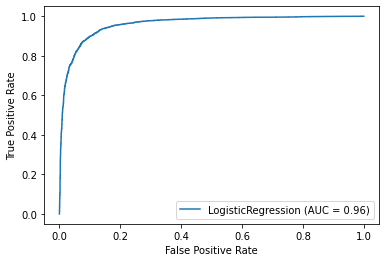

In [49]:
data(df_test).ROC(model)